In [2]:
from pipeline import pipeline
from chris import ldData, mlpClassification, makeTrainValSet, savePred
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
from heinrich import inv, crop, ecgExtract

# Evaluate Model

[Pipeline] Saved state found: ./cache/ldData()_crop(300)_inv(0.6)_ecgExtract()_makeTrainValSet(0.1), starting from function: mlpClassification
[Pipeline] executing: mlpClassification(500,True,False)


100%|██████████| 500/500 [02:43<00:00,  3.06it/s]

train losses
val losses


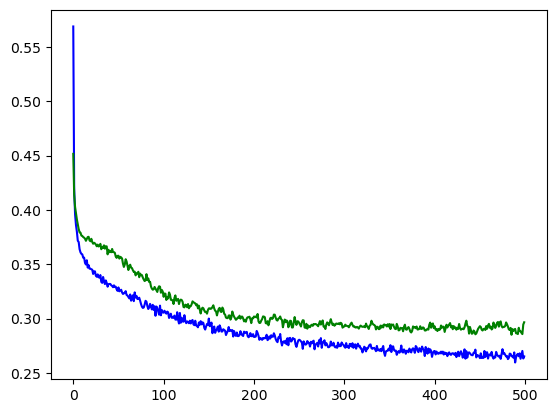

In [5]:
hyper = { 
    
    "inv_threshold": 0.6, 
    "crop_location": 300,
    "mlpClassification_epochs": 500,
    "mlpClassification_useValidationSet": True,
    "mlpClassification_makePrediction": False,
    "makeTrainValSet_valPercent": 0.1
}

data = pipeline([ ldData, crop, inv, ecgExtract, makeTrainValSet, mlpClassification ], hyper )
print( "train losses" )
plt.plot( data[ "train_losses" ], color = "blue" )
print( "val losses" )
plt.plot( data[ "val_losses" ], color = "green" )

# Predict

[Pipeline] Saved state found: ./cache/ldData()_crop(300)_inv(0.6)_ecgExtract(), starting from function: mlpClassification
[Pipeline] executing: mlpClassification(200,False,True)


100%|██████████| 200/200 [01:09<00:00,  2.88it/s]

[Pipeline] executing: savePred()
train losses


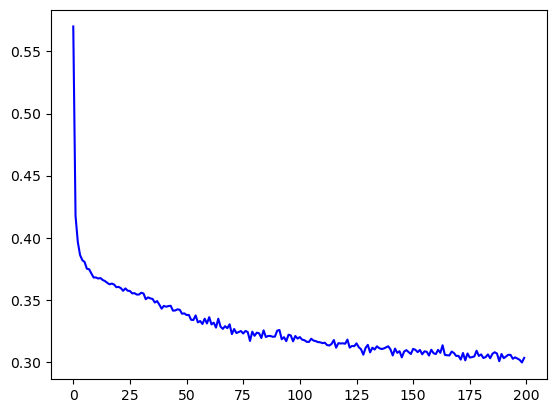

In [4]:
hyper = { 
    
    "inv_threshold": 0.6, 
    "crop_location": 300,
    "mlpClassification_epochs": 200,
    "mlpClassification_useValidationSet": False,
    "mlpClassification_makePrediction": True
}

data = pipeline([ ldData, crop, inv, ecgExtract, mlpClassification, savePred ], hyper )
print( "train losses" )
plt.plot( data[ "train_losses" ], color = "blue" )